In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import tensorflow
from keras.applications.resnet50 import ResNet50
from glob import glob
from keras.layers import Dense,Flatten,MaxPool2D,Lambda,Input
from keras.models import Sequential
from keras.models import Model


In [7]:
#We will cut the last layer and add 3 nodes at the end of the end(as we have 3 categories)

In [49]:
image_size=[224,224] #We will use this as this is default used by ResNet50

train_path='Datasets/Train'
test_path='Datasets/Test'

In [88]:
resnet=ResNet50(input_shape=image_size +[3],weights='imagenet',include_top=False)#Include_top is where we remove the last layer. We add[3] as we have 3 channels i.e r,g,b.

C:\Users\LaKgos01\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [89]:
# We are not using the existing weights.
for layer in resnet.layers:
    layer.trainable=False

In [90]:
folders=glob('Datasets/Train/*')

In [91]:
folders

['Datasets/Train\\audi',
 'Datasets/Train\\lamborghini',
 'Datasets/Train\\mercedes']

In [92]:
x=Flatten()(resnet.output)#We have to flatten the output that we have received from the resnet layer

In [93]:
prediction=Dense(len(folders),activation='softmax')(x)

#Create a model
model=Model(inputs=resnet.input,output=prediction)

C:\Users\LaKgos01\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  after removing the cwd from sys.path.


In [94]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [95]:
model.compile(
loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [96]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [97]:
train_datagen=ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

#In Test dataset, we should not apply data augmentation,We can just rescale but not create new images
test_datagen=ImageDataGenerator(
rescale=1./255)
''',
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)'''

',\nshear_range=0.2,\nzoom_range=0.2,\nhorizontal_flip=True)'

In [98]:
training_set=train_datagen.flow_from_directory('Datasets/Train',
                                              target_size=(224,224),
                                              batch_size=32,class_mode='categorical')

Found 55 images belonging to 3 classes.


In [99]:
test_set=test_datagen.flow_from_directory('Datasets/Test',
                                         target_size=(224,224),
                                         batch_size=32,
                                         class_mode='categorical')

Found 58 images belonging to 3 classes.


In [100]:
#Runing the model against Augmentation 

In [101]:
r=model.fit_generator(
    training_set,
validation_data=test_set,
epochs=50,
steps_per_epoch=len(training_set),
validation_steps=len(test_set))

Epoch 1/50
2/2 [==============================] - 40s 20s/step - loss: 6.8331 - accuracy: 0.2727 - val_loss: 5.2173 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 39s 19s/step - loss: 4.8979 - accuracy: 0.6364 - val_loss: 1.2083 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 45s 23s/step - loss: 4.0821 - accuracy: 0.7273 - val_loss: 4.6886 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 51s 25s/step - loss: 0.0671 - accuracy: 0.9636 - val_loss: 11.4930 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 42s 21s/step - loss: 0.4646 - accuracy: 0.9636 - val_loss: 13.0806 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 41s 20s/step - loss: 0.6218 - accuracy: 0.9455 - val_loss: 17.9043 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 43s 22s/step - loss: 0.4556 - accuracy: 0.9636 - val_loss: 19.2580 - val_accuracy: 0.3276
Epoch 8/50
1/2 [=======

KeyboardInterrupt: 

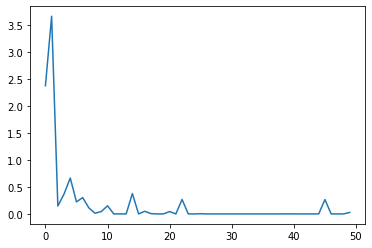

In [28]:
plt.plot(r.history['loss'],label='train loss')

In [31]:
r.history

{'val_loss': [4.3041582107543945,
  7.334332466125488,
  9.407994270324707,
  12.919819831848145,
  14.555975914001465,
  18.654117584228516,
  16.970191955566406,
  21.412588119506836,
  20.72658920288086,
  17.982891082763672,
  15.978250503540039,
  21.22738265991211,
  22.495059967041016,
  21.804365158081055,
  21.128511428833008,
  24.35745620727539,
  22.58681869506836,
  23.09278106689453,
  27.674264907836914,
  28.14387321472168,
  23.976032257080078,
  21.271099090576172,
  22.12319564819336,
  24.76059913635254,
  27.36040496826172,
  20.008363723754883,
  24.79994773864746,
  26.179584503173828,
  24.476070404052734,
  21.725313186645508,
  22.577585220336914,
  18.827768325805664,
  21.10957145690918,
  26.25303840637207,
  27.445016860961914,
  20.96636199951172,
  19.996196746826172,
  24.642635345458984,
  20.948537826538086,
  23.589550018310547,
  18.40596580505371,
  21.061092376708984,
  22.132829666137695,
  22.20087432861328,
  20.01514434814453,
  20.35316848754

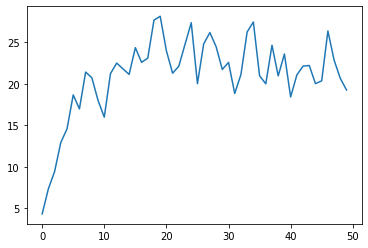

In [33]:
plt.plot(r.history['val_loss'])

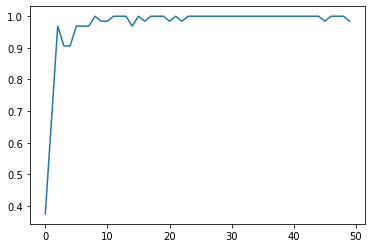

In [34]:
plt.plot(r.history['accuracy'])

In [35]:
model.save('model_resnet50_car_brand.h5')

In [36]:
y_pred=model.predict(test_set)

In [37]:
y_pred

array([[5.59598669e-15, 3.26275159e-16, 1.00000000e+00],
       [5.54962502e-14, 4.07107566e-16, 1.00000000e+00],
       [7.72469315e-15, 1.99722097e-16, 1.00000000e+00],
       [3.82130274e-15, 1.32745005e-16, 1.00000000e+00],
       [5.04676630e-15, 8.77950047e-17, 1.00000000e+00],
       [8.01716515e-15, 9.30687906e-17, 1.00000000e+00],
       [3.76467182e-15, 6.14314682e-17, 1.00000000e+00],
       [2.28920734e-14, 1.60261058e-15, 1.00000000e+00],
       [5.85881932e-15, 1.32836683e-16, 1.00000000e+00],
       [1.28282903e-14, 5.49900089e-16, 1.00000000e+00],
       [8.63304874e-15, 2.03412024e-16, 1.00000000e+00],
       [2.68725489e-14, 1.85130353e-16, 1.00000000e+00],
       [6.63511485e-15, 2.06214512e-16, 1.00000000e+00],
       [3.70291422e-15, 9.81746424e-18, 1.00000000e+00],
       [2.27555113e-14, 3.44404973e-16, 1.00000000e+00],
       [5.49105922e-15, 1.05292733e-16, 1.00000000e+00],
       [1.96858927e-14, 4.72676572e-16, 1.00000000e+00],
       [1.90353646e-14, 1.16606

In [38]:
y_pred=np.argmax(y_pred,axis=1)

In [39]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [43]:
from keras.models import load_model
from keras.preprocessing import image

In [44]:
model=load_model('model_resnet50_car_brand.h5')

In [45]:
img_data

NameError: name 'img_data' is not defined

In [120]:
img=image.load_img('Datasets/Test/lamborghini/10.jpg',target_size=(224,224))

In [121]:
x=image.img_to_array(img)

In [122]:
x

array([[[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        ...,
        [ 13.,   2.,   0.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 18.,   8.,   0.],
        [ 18.,   8.,   0.],
        [ 19.,   9.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       ...,

       [[209., 129.,  92.],
        [210., 130.,  93.],
        [212., 132.,  95.],
        ...,
        [216., 132.,  96.],
        [214., 129.,  92.],
        [213., 129.,  92.]],

       [[208., 128.,  91.],
        [208., 128.,  91.],
        [211., 131.,  94.],
        ...,
        [215., 131.,  95.],
        [209., 129.,  94.],
        [207., 129.,  93.]],

       [[206., 128.,  90.],
        [206., 128.,  90.],
        [209., 1

In [123]:
x.shape

(224, 224, 3)

In [124]:
x=x/255

In [125]:
x.reshape(1,224,224,3)

array([[[[0.06666667, 0.02745098, 0.        ],
         [0.06666667, 0.02745098, 0.        ],
         [0.06666667, 0.02745098, 0.        ],
         ...,
         [0.05098039, 0.00784314, 0.        ],
         [0.05490196, 0.01568628, 0.01176471],
         [0.05490196, 0.01568628, 0.01176471]],

        [[0.06666667, 0.02745098, 0.        ],
         [0.06666667, 0.02745098, 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.05490196, 0.01176471, 0.00392157],
         [0.05490196, 0.01568628, 0.01176471],
         [0.05490196, 0.01568628, 0.01176471]],

        [[0.07058824, 0.03137255, 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         [0.07450981, 0.03529412, 0.        ],
         ...,
         [0.05490196, 0.01176471, 0.00392157],
         [0.05490196, 0.01568628, 0.01176471],
         [0.05490196, 0.01568628, 0.01176471]],

        ...,

        [[0.81960785, 0.5058824 , 0.36078432],
         [0.8235294 , 0.50980395, 0.3647059 ]

In [115]:
from tensorflow.keras.applications.resnet50 import preprocess_input

In [116]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 1, 1, 1, 1, 1, 224, 224, 3)

In [130]:
x=x.reshape(1,224,224,3)

In [131]:
x.shape

(1, 224, 224, 3)

In [132]:
x

array([[[[0.06666667, 0.02745098, 0.        ],
         [0.06666667, 0.02745098, 0.        ],
         [0.06666667, 0.02745098, 0.        ],
         ...,
         [0.05098039, 0.00784314, 0.        ],
         [0.05490196, 0.01568628, 0.01176471],
         [0.05490196, 0.01568628, 0.01176471]],

        [[0.06666667, 0.02745098, 0.        ],
         [0.06666667, 0.02745098, 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.05490196, 0.01176471, 0.00392157],
         [0.05490196, 0.01568628, 0.01176471],
         [0.05490196, 0.01568628, 0.01176471]],

        [[0.07058824, 0.03137255, 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         [0.07450981, 0.03529412, 0.        ],
         ...,
         [0.05490196, 0.01176471, 0.00392157],
         [0.05490196, 0.01568628, 0.01176471],
         [0.05490196, 0.01568628, 0.01176471]],

        ...,

        [[0.81960785, 0.5058824 , 0.36078432],
         [0.8235294 , 0.50980395, 0.3647059 ]

In [135]:
pred=model.predict(x)

In [136]:
np.argmax(pred)

2